# The Physics of Sound, Part I

[return to main page](index.ipynb)

## Preparations

For this exercise we need the [Sound Field Synthesis Toolbox](http://sfstoolbox.org);

In [2]:
import sfs

And some other stuff:

In [3]:
# remove "inline" to get a separate plotting window:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.umath_tests import inner1d

A grid for plotting:

In [4]:
grid = sfs.util.xyz_grid([-2, 2], [-2, 2], 0, spacing=0.01)

Have a look at the [documentation](http://sfs.readthedocs.org/en/latest/#sfs.util.xyz_grid) to find out what the function parameters mean.

*Exercise:* What does the third argument mean in our case?
How many dimensions does our grid have?

## Physical Quantities

### Sound Pressure $p(\mathbf x, t)$

The acoustic sound pressure $p(\mathbf x, t)$ is the fluaction of the static pressure inside a medium (e.g. air) and hence changes the distribution of the atoms/molecules (particles) in a deterministic manner.

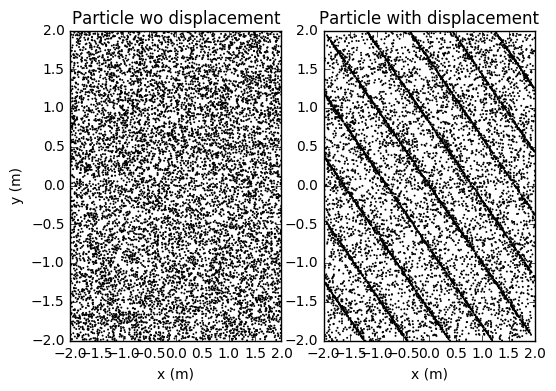

In [7]:
### create 10000 randomly distributed particles
particles = [np.random.uniform(-2, 2, 10000), np.random.uniform(-2, 2, 10000), 0];

# particles without displacement
plt.subplot(1,2,1)
sfs.plot.particles(particles, facecolor='black', s=2)
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.title('Particle wo displacement')

# particles with displacement
n = [np.sqrt(2), np.sqrt(2), 0];  # direction of displacement
f = 300;  # temporal frequency 
omega = 2*np.pi*f;  # angular frequency 
amplitude = 4e4  # unrealistically large to see an effect

v = sfs.mono.source.plane_velocity(omega, [0, 0, 0], n, random_grid)
particles = particles + amplitude * sfs.util.displacement(v, omega)
plt.subplot(1,2,2)
sfs.plot.particles(X, facecolor='black', s=2)
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.title('Particle with displacement')
plt.ylabel('');

### Particle Velocity $\mathbf v(\mathbf x, t)$

The particle velocity $\mathbf v(\mathbf x, t)$ describes the current velocity of the particle moving in the medium. Contrary to the sound pressure, the particle velocity is a vector field having a direction **and** a value for each point in space and time.

*Exercise*: In the right plot above, at which points in space is the amplitude of the particle velocity's the largest? Where is it the lowest?

### The Equation of State

$$ -\frac{\partial p(\mathbf x, t)}{\partial t} = \varrho_0 c^2 \nabla \cdot \mathbf v(\mathbf x, t) $$

*Exercise*: How does the speed of sound change $c$, if the medium is changed from air to water? Find the correct relation.

$$c_{\mathrm{air}}\,?\,c_{\mathrm{water}}$$

*Exercise*: How is the $\nabla$-operator defined? What is its meaning when being applied to a vector field?

### The Euler Equation

$$ -\varrho_0 \frac{\partial \mathbf v(\mathbf x, t)}{\partial t} =  \nabla p(\mathbf x, t) $$

*Exercise*: What is the meaning of $\nabla$-operator when being applied to a scalar or a vector field?

## The Wave Equation

In linear acoustics, a sound pressure field $p(\mathbf x, t)$ fulfils the wave equation

$$\Delta p(\mathbf x, t) + \frac{1}{c^2} \frac{\partial^2}{\partial t^2} p(\mathbf x, t) = -q(\mathbf x, t)$$

*Exercise*: How is the $\Delta$-operator defined?

$$ \Delta =\,???$$  

If we apply the temporal Fourier Transform to the wave equation, we get the Helmholtz equation

$$\Delta P(\mathbf x, \omega) + \frac{1}{c^2} \frac{\partial^2}{\partial t^2} P(\mathbf x, \omega) = -Q(\mathbf x, \omega)$$

*Exercise*: How is the temporal Fourier Transform defined?

$$ P(\mathbf x, \omega) = \,???\, p(\mathbf x, t) \,???\, $$

*Exercise*: What do the terms *homogeneous* and *inhomogeneous* mean in the context of the wave equation and the Helmholtz equation?

homogeneous:  
inhomogeneous:

## Selected Solutions of the Wave Equation (Acoustic Sources)

### Plane Wave

$q_{pw}(\mathbf x, t) = 0$ corresponds to a plane wave

$$p_{pw}(\mathbf x, t) = \delta \left(t - \dfrac{\omega}{c} \left\langle\mathbf n_{\mathrm {pw}} \big|\, \mathbf x  \right\rangle \right)$$

with its direction of progation defined by the vector $\mathbf n_{\mathrm {pw}}$ with $|\mathbf n_{\mathrm {pw}}| = 1$.

*Exercise*: What the is temporal Fourier Transform of the above equation? Hind: Keep the Fourier transform of a dirac impulse and the shift theorem in mind.

$$P_{pw}(\mathbf x, \omega) = ??? $$

Let's plot a [plane wave](http://sfs.readthedocs.io/en/latest/#equation-S.pw) with a frequency of 1000 Hertz which propagates in the direction of the negative y-axis.

In [ ]:
x0 = 0, 0, 0  # point of zero phase (metre)
npw = 0, -1, 0  # propagation vector (unit length)
f = 1000  # time-frequency (Hz)
omega = 2 * np.pi * f  # angular frequency (rad/s)

p_plane = sfs.mono.source.plane(omega, x0, npw, grid);  # compute sound pressure field
sfs.plot.soundfield(p_plane, grid);  # plotting command
plt.title("Plane wave with $n_{{pw}} = {}$".format(npw));  # set title of plot

*Exercise:* How can you see that the plane wave in the plot travels down and not up?

*Exercise:* Try different propagation angles and different frequencies.

*Exercise*: How does the sound field change, if we change the speed of sound? BTW, you can get (and set) the speed of sound currently used by the SFS toolbox via the variable `sfs.defs.c`. How are speed of sound, frequency and wave length related?

*Exercise:* How does the level of the plane wave decay over distance? Use the corresponding function to plot the level.

In [ ]:
sfs.plot.level?

*Exercise:* How does the sound field look like, if some components of $\mathbf n_{\mathrm {pw}}$ are imaginary?

In [ ]:
npw = 1j*np.sqrt(2), np.sqrt(3), 0  # propagation vector (still unit length!!!)

### Point Source

The density $q_{ps}(\mathbf x, t) = \delta(t)\delta(x-x_s)\delta(y-y_s)\delta(z-z_s)$ corresponds to a point source

$$p_{ps}(\mathbf x, t) = \delta \left(t - \dfrac{|\mathbf x-\mathbf x_{\mathrm s}|}{c}\right)$$

with its position defined by the vector $\mathbf x_{\mathrm {s}} = [x_s,y_s,z_s]^{\mathrm T}$.

*Exercise*: What the is temporal Fourier Transform of the above equation

$$P_{ps}(\mathbf x, \omega) = ???$$

Let's plot a [point source](http://sfs.readthedocs.org/#sfs.mono.source.point) at the position $(0, 1.5, 0)$ metres with a frequency of 1000 Hertz.

In [ ]:
xs = 0, 1.5, 0  # position (metre)
f = 1000  # time-frequency (Hz)
omega = 2 * np.pi * f  # angular frequency (rad/s)

p_point = sfs.mono.source.point(omega, xs, None, grid)
sfs.plot.soundfield(p_point, grid)
plt.title("Point Source at {} m".format(xs));

The amplitude of the sound field is a bit weak ...

*Exercise:* Multiply the sound pressure field by a scaling factor of $4\pi$ to get an appropriate amplitude.

In [ ]:
scaling_factor_point_source = 4 * np.pi

*Exercise:* Try different source positions and different frequencies.

*Exercise:* Compare the amplitude decay of a point source and a plane wave.

### Line Source

$q_{ls}(\mathbf x, t) = \delta(t)\delta(x-x_s)\delta(y-y_s)$ corresponds to a line source parallel to the $z$-axis with its position defined by the vector $\mathbf x_{\mathrm {s}} = [x_s, y_s, 0]^{\mathrm T}$. Its temporal Fourier spectrum is given as:

$$ P_{ls}(\mathbf x, \omega) = -\frac{j}{4} H_0\left(\sqrt{(x-x_s)^2 + (y-y_s)^2}\right) $$

Let's plot a [line source](http://sfs.readthedocs.org/#sfs.mono.source.line) (parallel to the z-axis) at the position $(0, 1.5)$ metres with a frequency of 1000 Hertz.

In [ ]:
xs = 0, 1.5  # position (metre)
f = 1000  # time-frequency (Hz)
omega = 2 * np.pi * f  # angular frequency (rad/s)

p_line = sfs.mono.source.line(omega, xs, None, grid)
sfs.plot.soundfield(p_line, grid)
plt.title("Line Source at {} m".format(xs[:2]));

Again, the amplitude is a bit weak, let's scale it up!
This time, the scaling factor is a bit more involved:

In [ ]:
scaling_factor_line_source = np.sqrt(8 * np.pi * omega / sfs.defs.c) * np.exp(1j * np.pi / 4)

*Exercise:* Scale the sound field by the given factor.

*Exercise:* Again, try different source positions and different frequencies.

*Exercise:* What's the difference between the sound fields of a point source and a line source?

### Dipole Source

This time, we start with the exercises and get to the sound field of the dipole source afterwards.

*Exercise*: Compute the sound field of two point sources lying on a axis with orientation $\mathbf n_s$ with a distance $h=0.1$ m between them. Normalize the resulting sound field by $2h$.

In [ ]:
h = 0.1 # distance between the two sources
xs = np.array([0,0,0])  # coordinate between the two sources
ns = np.array([1,0,0])  # orientation of the axis between the two sources

# xs1 = ???  # position of the first point source
# xs2 = ???  # position of the second point source

# p_point1 = ???
# p_point2 = ???

# p_res = ???

sfs.plot.soundfield(p_res, grid)

*Exercise*: Reduce the distance between the point source. What can you observe?

The exact sound field of the Dipole Source is the limiting case of the above example.

$$P_{dps}(\mathbf x, \omega) = \lim_{h \rightarrow \infty} \frac{
    P_{ps}(\mathbf x - h\,\mathbf n_s) - P_{ps}(\mathbf x + h \mathbf n_s)
    }
    {2h} $$

*Exercise*: Any idea what mathematically meaning this limit has?

*Exercise*: Plot the the exact sound field of a dipole source.

In [ ]:
sfs.mono.source.point_dipole?